<h1 align="center">SEO Click Prediction and Inference Using Machine Learning (Linear Regression) on Google Search Console Data</h1>

<h3 align="center">Sankar Gurumurthy</h3>

<p align="center">
  <b>Head of SEO | AI/ML & Data-Driven Digital Marketing</b><br>
  Bridging Marketing and Data Science<br><br>
  <a href="https://www.linkedin.com/in/sankar-gurumurthy-a1044a136/">LinkedIn</a> |
  <a href="https://x.com/SankarGurumurt1">Twitter</a> |
  <a href="https://github.com/sg-sankar">GitHub</a>
</p>

<hr>

<p align="center">
  © 2025 Sankar Gurumurthy  
  <br>
  <i>Prepared by Sankar Gurumurthy — Head of SEO | AI/ML & Data-Driven Digital Marketing</i>
</p>


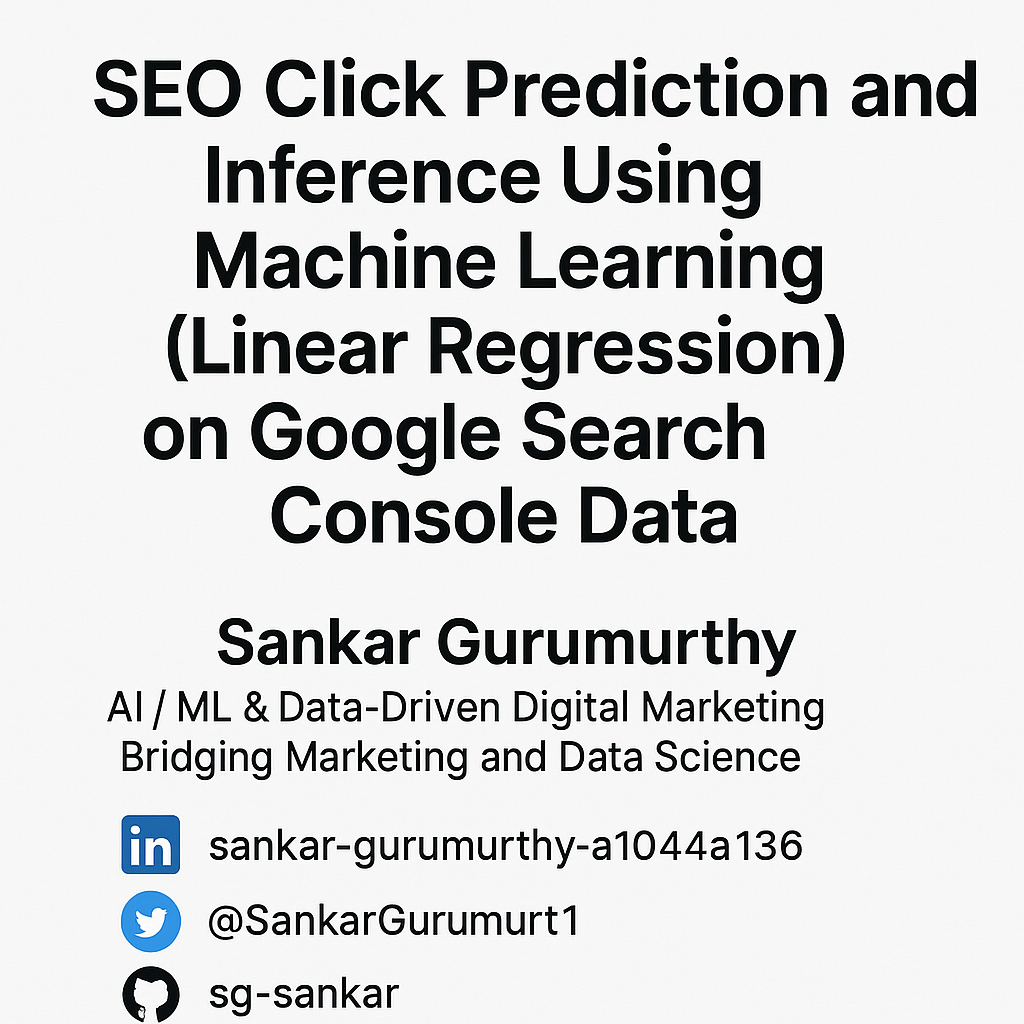

# **Problem Statement**

## **Business Context**

In today’s competitive digital landscape, local service businesses depend heavily on location (city)-specific landing pages to attract organic traffic and convert local searchers into leads. With growing pressure to maximize online visibility and ROI, it's critical for marketing teams to understand which factors drive organic clicks and how to scale success across regions.

A digital agency managing SEO for a multi-location service provider faces the challenge of varying performance across different city pages—driven by fluctuations in impressions, rankings, and content quality. To improve predictability and performance, the agency seeks to leverage historical data from Google Search Console to forecast organic clicks for each page.

This project uses linear regression to model the relationship between key SEO metrics—such as impressions, CTR, and average position—and organic clicks. It also incorporates writer information to evaluate how content creators influence performance across different pages.

Accurate predictions of future traffic will not only help guide SEO content strategy and writer feedback, but also enable smarter decisions about cross-channel investments. For instance, if projected SEO traffic for a certain city is low, marketing budgets can be redirected to paid media or social campaigns to meet lead targets—resulting in more efficient resource allocation and stronger overall performance.



## **Objectives**

As a data scientist, you are provided with performance data from Google Search Console for multiple local SEO landing pages. This includes metrics such as impressions, average position, click-through rate (CTR), and the writer associated with each page.

You are required to analyze this data, identify trends and patterns, and build a linear regression model to predict future organic clicks. The goal is to quantify how each SEO factor influences clicks and to provide actionable insights for improving page performance. Additionally, the model should help evaluate how different content writers impact organic outcomes and support strategic planning for cross-channel marketing investments.


## **Why Linear Regression?**

Linear regression is an appropriate choice for this use case because it assumes a linear relationship between predictors like impressions, position, and CTR, and the target variable — organic clicks. This allows for both straightforward prediction and interpretable insights into how each SEO factor contributes to click performance.



## **Data Dictionary**



| Column Name       | Description                                                                                           |
|-------------------|-------------------------------------------------------------------------------------------------------|
| **Page_URL**      | The specific URL of the local service landing page                                                    |
| **Month**         | The reporting month for the data (e.g., Jan 2025)                                                     |
| **Impressions**   | Number of times the page appeared in Google search results                                            |
| **CTR (%)**       | Click-through rate – the percentage of impressions that resulted in a click                          |
| **Avg. Position** | The average ranking position of the page in search results (lower is better)                         |
| **Clicks**        | The number of times users clicked on the page from search results                                     |
| **Writer**        | The content writer responsible for creating or managing the page content                             |


**Note**: Writer data can be obtained from internal project documents

# **Importing the necessary libraries**

In [1]:
# to load and manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to split the data into train and test sets
from sklearn.model_selection import train_test_split

# to build a linear regression model
from sklearn.linear_model import LinearRegression

# to check a regression model's performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Loading the data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading data into a pandas dataframe
clicks = pd.read_csv('/content/drive/MyDrive/SEO AI ML DS projects/ML SEO/Linear regression/local_seo_dataset_with_outliers.csv')


In [4]:
# creating a copy of the data
data = clicks.copy()

# **Data Overview**

## **Checking the first 5 rows**

In [5]:
data.head(5)

,Page_URL,Month,Impressions,CTR (%),Avg. Position,Clicks,Writer
0,abc.com/loan-consulting-mumbai,2024-08,5296,6.2,4.4,328,Anil
1,abc.com/loan-consulting-mumbai,2024-09,5416,5.4,4.6,292,Anil
2,abc.com/loan-consulting-mumbai,2024-10,5626,5.5,4.5,309,Anil
3,abc.com/loan-consulting-mumbai,2024-11,6013,5.2,4.9,312,Anil
4,abc.com/loan-consulting-mumbai,2024-12,5856,6.2,3.8,363,Anil


## **Checking the shape of the data**



In [6]:
data.shape

(150, 7)

* The dataset has 150 rows and 7 columns.

## **Checking the attribute types**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Page_URL       150 non-null    object 
 1   Month          150 non-null    object 
 2   Impressions    150 non-null    int64  
 3   CTR (%)        150 non-null    float64
 4   Avg. Position  150 non-null    float64
 5   Clicks         150 non-null    int64  
 6   Writer         150 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 8.3+ KB


### Observations

* There are 4 numerical and 2 categorical variables in the original dataset.
* `Month` is currently treated as an object. It can be converted to datetime format and transformed into a numeric time index (`Month_Index`) to capture trends over time.
* `Writer` is a categorical variable and can be one-hot encoded before modeling.
* `Page_URL` is a text field, but we can extract the `City` from it. This extracted location will serve as an additional categorical variable, which can also be one-hot encoded later and included in the regression model.


In [8]:
# 1. Convert 'Month' to datetime and create 'Month_Index'
data['Month'] = pd.to_datetime(data['Month'])
min_date = data['Month'].min()
data['Month_Index'] = (data['Month'].dt.year - min_date.year) * 12 + (data['Month'].dt.month - min_date.month) + 1

# 2. Extract 'City' from 'Page_URL'
data['City'] = data['Page_URL'].str.extract(r'-([a-zA-Z]+)$')
data['City'] = data['City'].fillna('Unknown')  # optional


Let us check the attribute types again

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Page_URL       150 non-null    object        
 1   Month          150 non-null    datetime64[ns]
 2   Impressions    150 non-null    int64         
 3   CTR (%)        150 non-null    float64       
 4   Avg. Position  150 non-null    float64       
 5   Clicks         150 non-null    int64         
 6   Writer         150 non-null    object        
 7   Month_Index    150 non-null    int32         
 8   City           150 non-null    object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(3)
memory usage: 10.1+ KB


As needed, we have created `City` and `Month_Index` columns, which can later be encoded and included in the regression model.

## **Checking the statistical summary**

In [10]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Month,150,2024-12-16 02:24:00,2024-08-01 00:00:00,2024-10-01 00:00:00,2024-12-16 12:00:00,2025-03-01 00:00:00,2025-05-01 00:00:00,NaN
Impressions,150.0,4915.973333,2118.0,3593.5,4582.5,6215.5,8810.0,1684.270459
CTR (%),150.0,3.748,1.0,2.325,3.7,5.275,6.5,1.662162
Avg. Position,150.0,6.326,3.3,4.925,6.5,7.7,11.9,1.726712
Clicks,150.0,205.566667,21.0,81.5,143.0,328.0,572.0,145.84309
Month_Index,150.0,5.5,1.0,3.0,5.5,8.0,10.0,2.881904


### Observations from Statistical Summary

* The dataset contains 150 records across all numeric columns.
* On average, each page has received approximately **4,916 impressions**, with a maximum of **8,810** and a minimum of **2,118**.
* The average **click-through rate (CTR)** is **3.75%**, ranging from **1.0% to 6.5%**, indicating moderate variation in performance.
* The average **search position** is **6.3**, with pages ranging between positions **3.3 and 11.9**, showing most content ranks on the first or second page of Google.
* The average number of **clicks per page** is approximately **205**, with some pages getting as few as **21** and others as many as **572**.
* The `Month_Index` ranges from **1 to 10**, representing 10 time periods (months) of data — showing a consistent monthly time series.


## **Checking for missing values**

In [11]:
data.isnull().sum()

,0
Page_URL,0
Month,0
Impressions,0
CTR (%),0
Avg. Position,0
Clicks,0
Writer,0
Month_Index,0
City,0


* There are no missing values in the data

## **Checking for duplicate values**

In [12]:
# checking for duplicate values
data.duplicated().sum()

np.int64(0)

* There are no duplicate values in the data

# **Exploratory Data Analysis**

## **Univariate Analysis**

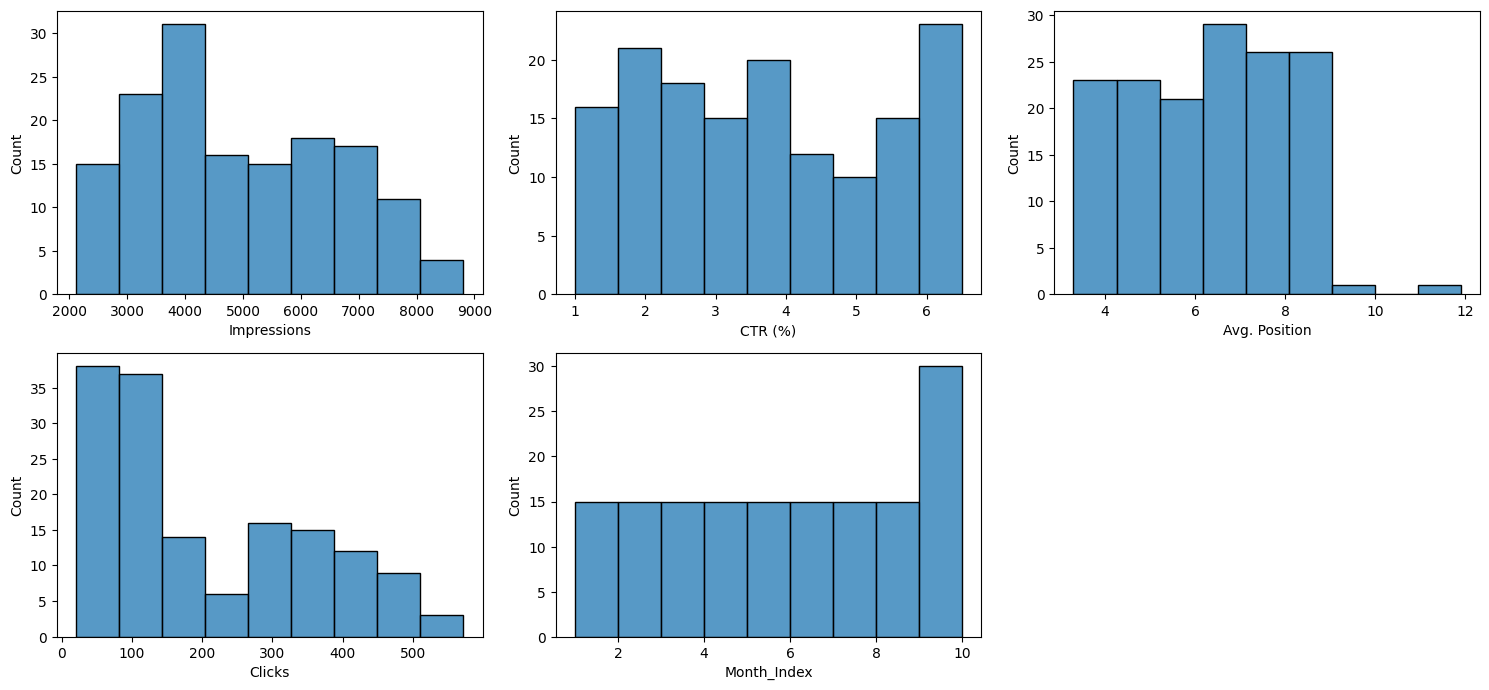

In [13]:
# defining the figure size
plt.figure(figsize=(15, 10))

# defining the list of numerical features to plot
features = data.select_dtypes(include=['number']).columns.tolist()

# creating the histograms
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)    # assign a subplot in the main plot
    sns.histplot(data=data, x=feature)    # plot the histogram

plt.tight_layout()    # to add spacing between plots
plt.show()

### Observations from Histograms of Numerical Features

* **Impressions**: The distribution is slightly right-skewed, with most pages receiving between 3,000 and 6,000 impressions. A few pages have significantly higher impressions (~8,000+).
* **CTR (%)**: The CTR is spread relatively evenly, with concentrations between 2% and 6%. A few pages have CTRs close to the maximum (6.5%).
* **Avg. Position**: Most pages rank between positions 4 and 8. A small number of pages have poor rankings (above position 10).
* **Clicks**: This is **heavily right-skewed**, indicating that most pages get fewer clicks (under 150), while a few high-performing pages receive over 500.
* **Month_Index**: The distribution is fairly uniform across months, with a slight increase in data points in the most recent month. This shows the data covers about 10 months consistently.


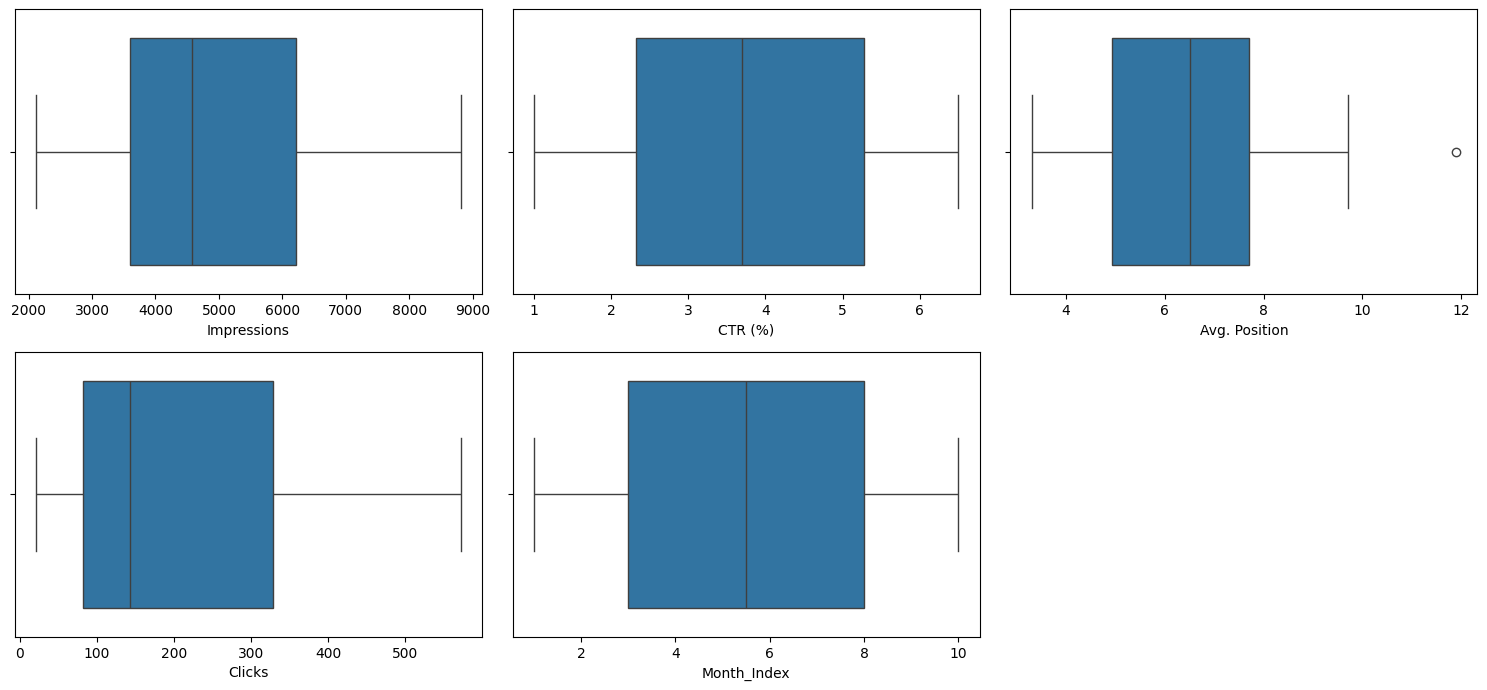

In [14]:
# defining the figure size
plt.figure(figsize=(15, 10))

# defining the list of numerical features to plot
features = data.select_dtypes(include=['number']).columns.tolist()

# creating the histograms
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)    # assign a subplot in the main plot
    sns.boxplot(data=data, x=feature)    # plot the histogram

plt.tight_layout()    # to add spacing between plots
plt.show()

### Observations from Boxplots

* **Impressions**: Distribution is slightly right-skewed. A few high values exist, but no extreme outliers are visible.
* **CTR (%)**: The CTR distribution is fairly symmetric, and no major outliers are observed.
* **Avg. Position**: Mostly falls between positions 4 and 9, with a couple of mild outliers above position 10.
* **Clicks**: Right-skewed distribution, but no visible statistical outliers in the boxplot. Most values are clustered toward the lower end, with a few high values within the whisker range.

* **Month_Index**: Uniformly distributed without any outliers. As expected, it reflects a consistent monthly sequence.


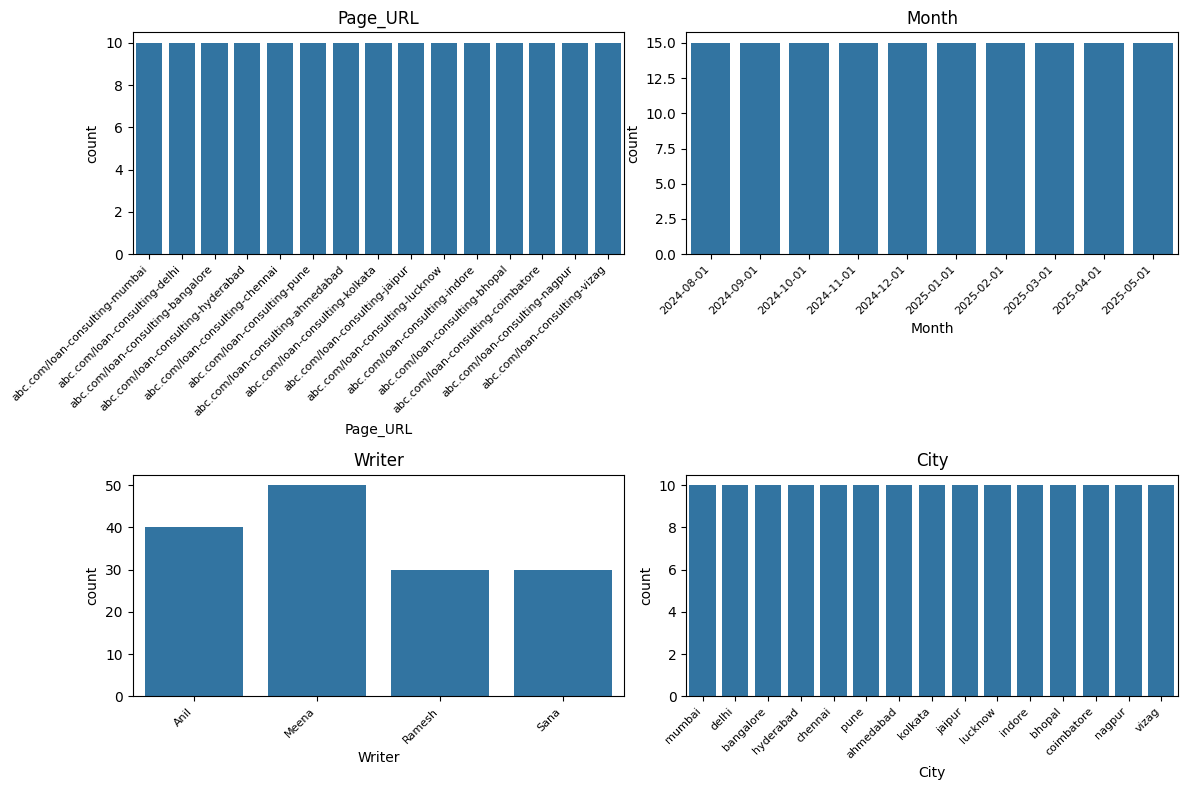

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Get all non-numeric (categorical) features
features = data.select_dtypes(exclude=['number']).columns.tolist()

# Set up grid size dynamically
n = len(features)
cols = 2
rows = math.ceil(n / cols)

plt.figure(figsize=(cols * 6, rows * 4))

for i, feature in enumerate(features):
    plt.subplot(rows, cols, i + 1)
    sns.countplot(data=data, x=feature)
    plt.title(feature)
    plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()


### Observations from Categorical Feature Count Plots

* **Page_URL** and **City**: These have high cardinality and uniform distribution. Since each page/city is represented equally (around 10 occurrences each), they don't provide immediate insights in raw form. These columns will be more useful after one-hot encoding or when aggregated (e.g., average clicks per city).
* **Month**: Evenly distributed across time periods, which is ideal for time-based modeling. No missing months or data gaps.
* **Writer**: This is the most insightful categorical feature. The distribution shows:
  - **Meena** contributed the most content (~50 pages)
  - **Anil** follows (~40 pages)
  - **Ramesh** and **Sana** contributed fewer (~30 each)
  This can help analyze whether certain writers are associated with better performance.


## **Bivariate Analysis**

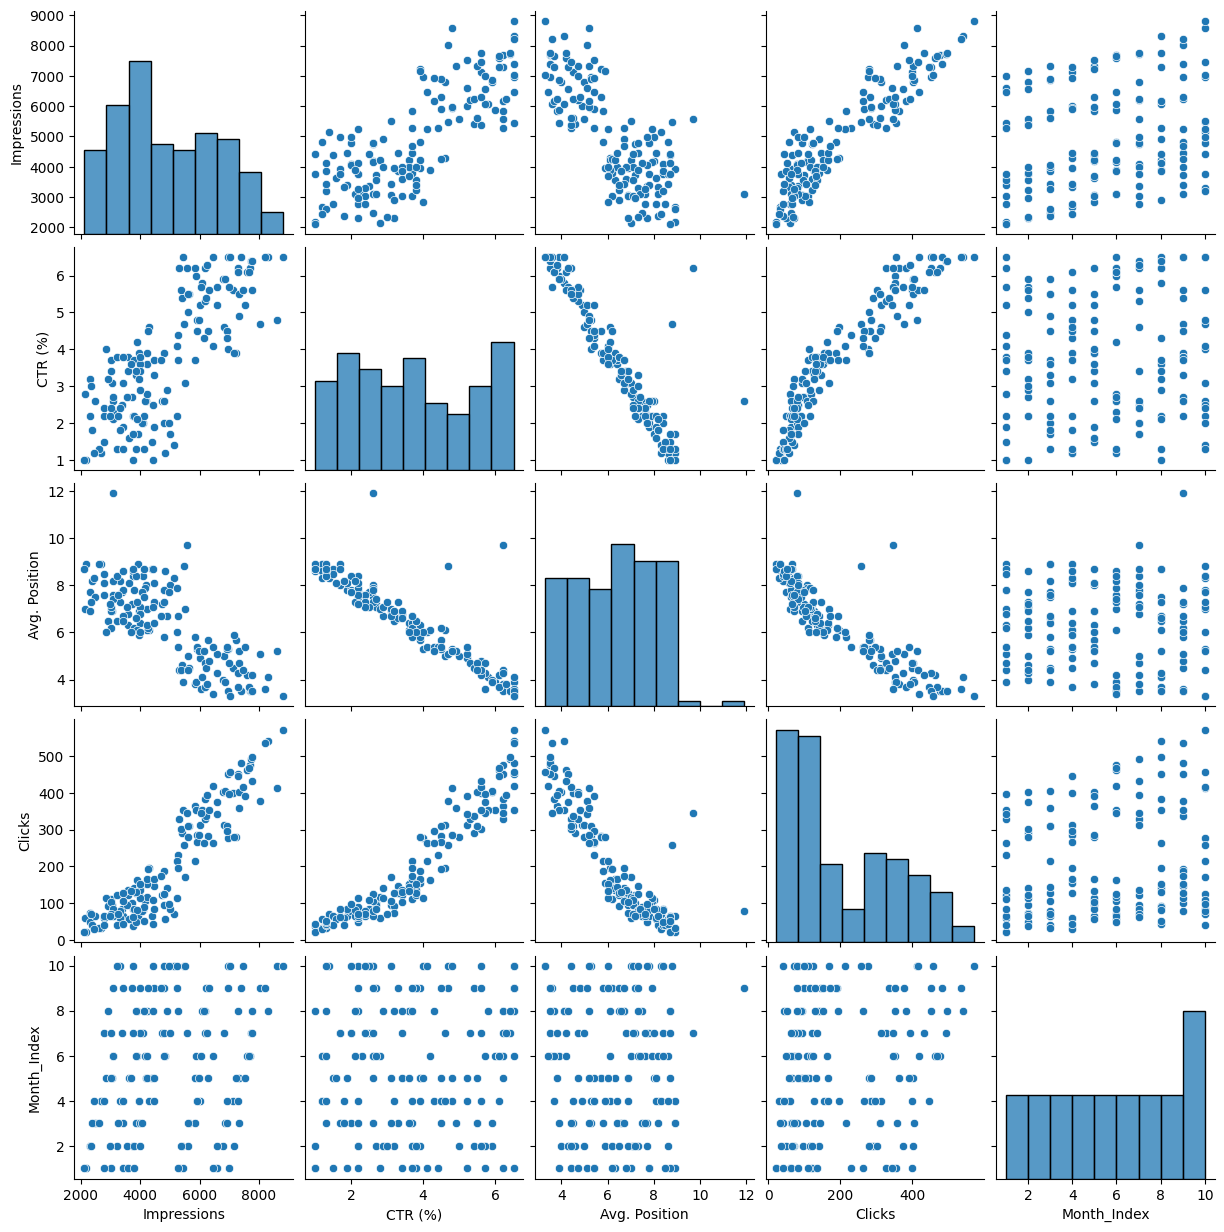

In [16]:
sns.pairplot(data);

### Observations from Pairplot Analysis (Numerical Features)

* **Clicks vs Impressions**:
  - Strong positive linear relationship.
  - Pages with higher impressions generally receive more clicks.

* **Clicks vs CTR (%)**:
  - Strong positive correlation.
  - As expected, higher CTR leads to higher organic clicks.

* **Clicks vs Avg. Position**:
  - Strong **negative correlation**.
  - Better rankings (lower position number) result in significantly more clicks.

* **Clicks vs Month_Index**:
  - **No clear trend** is visible.
  - Clicks are distributed fairly evenly across all months — indicating stable performance over time.

* **CTR (%) vs Avg. Position**:
  - Clearly negatively correlated — better-ranked pages tend to have higher CTR.

* **Impressions vs CTR (%)**:
  - Shows a **non-linear spread**, suggesting that pages with high impressions do not necessarily have high CTR.
  - This supports the idea that visibility doesn't guarantee relevance or engagement.

* **Month_Index vs other features**:
  - No strong patterns with CTR, Impressions, or Position — confirming that time progression hasn’t strongly affected these metrics.

---

### Summary:
- The strongest predictors of **Clicks** are clearly **CTR (%)**, **Impressions**, and **Avg. Position**.
- **Month_Index** does not appear to influence performance in this dataset — useful to include for trend completeness, but not impactful.


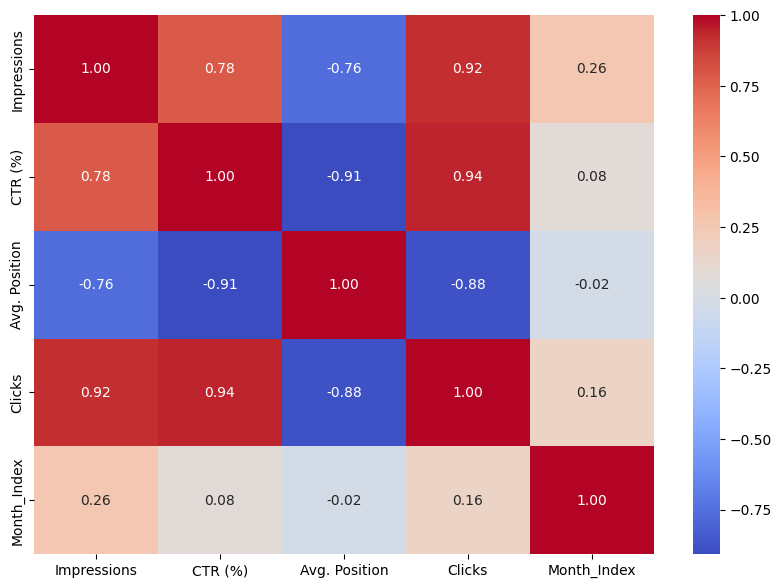

In [17]:
# defining the figure size
plt.figure(figsize=(10, 7))

# plotting the correlation heatmap
sns.heatmap(data.corr(numeric_only = True), annot=True, fmt='0.2f', cmap='coolwarm');

### Observations from Correlation Heatmap

* **Clicks** has:
  - A **very strong positive correlation** with:
    - **CTR (%)** (0.94)
    - **Impressions** (0.92)
  - A **strong negative correlation** with:
    - **Avg. Position** (-0.88)
  - A **very weak correlation** with:
    - **Month_Index** (0.16) — confirms clicks have not significantly changed over time

* **CTR (%)** is:
  - Highly **negatively correlated** with **Avg. Position** (-0.91), showing better rankings lead to higher CTR
  - Strongly correlated with both **Clicks** (0.94) and **Impressions** (0.78)

* **Impressions and Avg. Position**:
  - Are moderately negatively correlated (-0.76), suggesting better-ranked pages tend to appear more frequently

* **Month_Index** shows negligible correlation with all features, meaning time hasn't notably influenced impressions, CTR, or clicks in this dataset

---

### Conclusion:
The best predictors for **Clicks** are:
- **CTR (%)**
- **Impressions**
- **Avg. Position**

These three features show high linear correlation with the target and should be prioritized in the regression model.


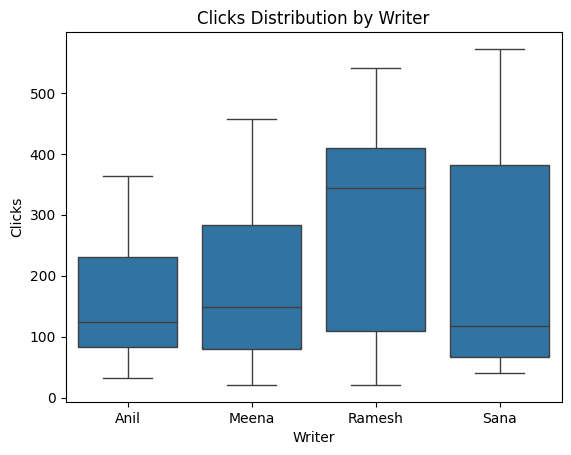

In [18]:
sns.boxplot(data=data, x='Writer', y='Clicks')
plt.title("Clicks Distribution by Writer")
plt.show()


✅ Observations:
Ramesh has the highest median clicks, indicating strong overall performance.

Sana shows a wide range in clicks — some high-performing content, but also variability.

Meena and Anil have lower median clicks, suggesting their content gets fewer clicks on average.



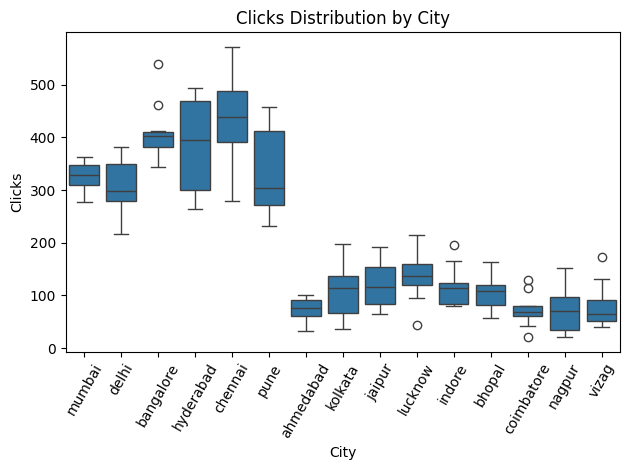

In [19]:
sns.boxplot(data=data, y='Clicks', x='City')
plt.title("Clicks Distribution by City")
plt.xticks(rotation=60)  # Rotate labels for better readability
plt.tight_layout()       # Optional: avoids clipping of labels
plt.show()


Top-performing cities in terms of clicks are Mumbai, Delhi, Bangalore, Hyderabad, Chennai, and Pune — they show higher medians and broader ranges.

Smaller cities like Indore, Bhopal, Nagpur, and Vizag have significantly lower click volumes and tighter distributions.

This indicates that location has a strong influence on content performance, likely due to differences in search volume and audience size.



# **Data Preparation for Modeling**

In [20]:
# defining the explanatory (independent) and response (dependent) variables
X = data.drop('Clicks', axis=1)
y = data['Clicks']

In [21]:
# splitting the data in 80:20 ratio for train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,    # specifying the independent variables
    y,    # specifying the dependent variable
    test_size=0.20,    # specifying the size of the test set as a fraction of the whole data
    random_state=42    # specifying a seed value to enable reproducible results
)

# **Model Building**

## **Simple Linear Regression - `Clicks` vs `CTR (%)`**


In [23]:
# defining the independent variable
ind_vars1 = ['CTR (%)']


In [24]:
# creating an instance of the linear regression model
lin_reg1 = LinearRegression()

# fitting the model to the training data
lin_reg1.fit(X_train[ind_vars1], y_train)

LinearRegression()

In [25]:
# printing the linear regression coefficients
print(
    "Slope:", lin_reg1.coef_,
    "Intercept:", lin_reg1.intercept_,
)

Slope: [83.09968689] Intercept: -105.33040682986214


In [26]:
# printing the linear regression equation
print(
    "Clicks =",
     "(", lin_reg1.coef_[0], ")", "*", ind_vars1[0],
    "+", lin_reg1.intercept_,
)


Clicks = ( 83.09968689195709 ) * CTR (%) + -105.33040682986214


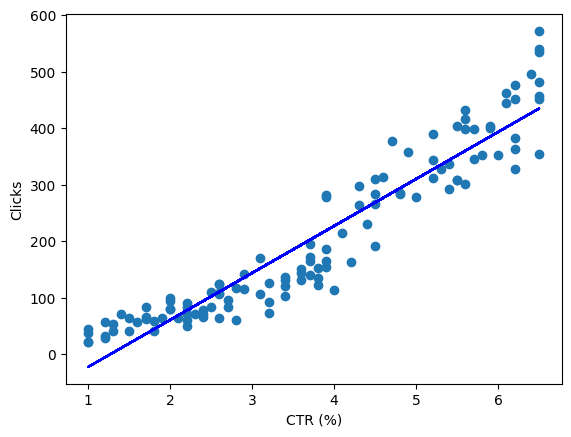

In [27]:
# plotting the best-fit line
fitted_values1 = lin_reg1.predict(X_train[ind_vars1])

# Plot the scatterplot and regression line
plt.scatter(X_train[ind_vars1], y_train)
plt.plot(X_train[ind_vars1], fitted_values1, color='blue')
plt.xlabel(ind_vars1[0])
plt.ylabel('Clicks')
plt.show()


## **Simple Linear Regression - `Clicks` vs `Impressions`**


In [28]:
# defining the independent variable
ind_vars2 = ['Impressions']

In [29]:
# creating an instance of the linear regression model
lin_reg2 = LinearRegression()

# fitting the model to the training data
lin_reg2.fit(X_train[ind_vars2], y_train)

LinearRegression()

In [30]:
# printing the linear regression coefficients
print(
    "Slope:", lin_reg2.coef_,
    "Intercept:", lin_reg2.intercept_,
)

Slope: [0.08068402] Intercept: -190.69282063814344


In [32]:
# printing the linear regression equation
print(
    "Clicks =",
    "(", lin_reg2.coef_[0], ")", "*", ind_vars2[0],
    "+", lin_reg2.intercept_,
)


Clicks = ( 0.08068401624156131 ) * Impressions + -190.69282063814344


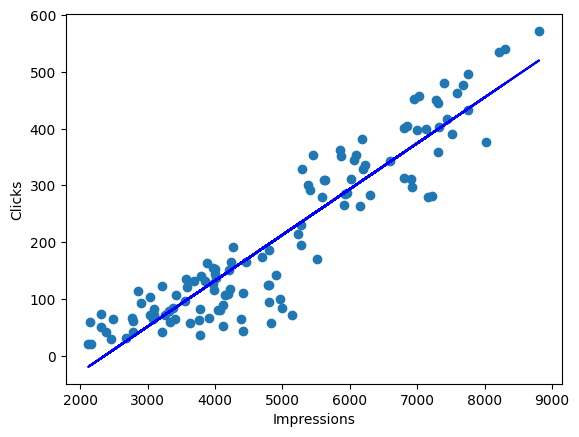

In [33]:
# plotting the best-fit line
fitted_values2 = lin_reg2.predict(X_train[ind_vars2])

# Plot the scatterplot and regression line
plt.scatter(X_train[ind_vars2], y_train)
plt.plot(X_train[ind_vars2], fitted_values2, color='blue')
plt.xlabel(ind_vars2[0])
plt.ylabel('Clicks')
plt.show()


## **Simple Linear Regression - `Clicks` vs `Avg. Position`**


In [34]:
# defining the independent variable
ind_vars3 = ['Avg. Position']


In [35]:
# creating an instance of the linear regression model
lin_reg3 = LinearRegression()

# fitting the model to the training data
lin_reg3.fit(X_train[ind_vars3], y_train)

LinearRegression()

In [36]:
# printing the linear regression coefficients
print(
    "Slope:", lin_reg3.coef_,
    "Intercept:", lin_reg3.intercept_,
)

Slope: [-83.81647795] Intercept: 728.8139360227126


In [37]:
# printing the linear regression equation
print(
    "Clicks =",
    "(", lin_reg3.coef_[0], ")", "*", ind_vars3[0],
    "+", lin_reg3.intercept_,
)


Clicks = ( -83.81647794797311 ) * Avg. Position + 728.8139360227126


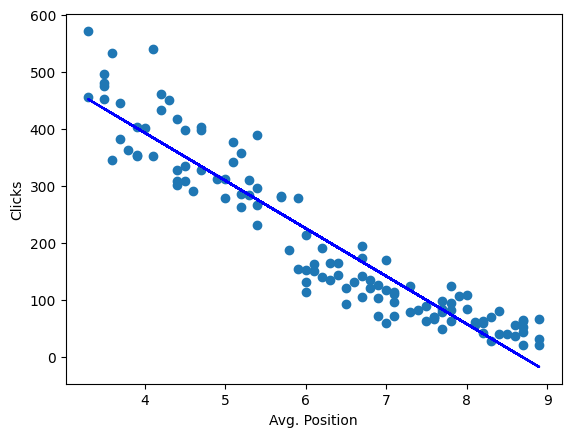

In [38]:
# plotting the best-fit line
fitted_values3 = lin_reg3.predict(X_train[ind_vars3])

# Plot the scatterplot and regression line
plt.scatter(X_train[ind_vars3], y_train)
plt.plot(X_train[ind_vars3], fitted_values3, color='blue')
plt.xlabel(ind_vars3[0])
plt.ylabel('Clicks')
plt.show()


## **Multiple Linear Regression - `Clicks` vs `CTR (%)`, `Impressions`**


In [39]:
# defining the independent variables
ind_vars4 = ['CTR (%)', 'Impressions']


In [40]:
# creating an instance of the linear regression model
lin_reg4 = LinearRegression()

# fitting the model to the training data
lin_reg4.fit(X_train[ind_vars4], y_train)

LinearRegression()

In [41]:
# printing the linear regression coefficients
print(
    "Coefficients:", lin_reg4.coef_, lin_reg4.intercept_
)

Coefficients: [4.97493683e+01 4.15927493e-02] -184.98496010194523


In [42]:
# printing the linear regression equation
print(
    "Clicks =",
    "(", lin_reg4.coef_[0], ")", "*", ind_vars4[0],
    "+ (", lin_reg4.coef_[1], ")", "*", ind_vars4[1],
    "+", lin_reg4.intercept_,
)


Clicks = ( 49.74936827418907 ) * CTR (%) + ( 0.041592749328497415 ) * Impressions + -184.98496010194523


## **Multiple Linear Regression - `Clicks` vs `CTR (%)`, `Impressions`, `Avg. Position`**


In [43]:
# defining the independent variables
ind_vars5 = ['CTR (%)', 'Impressions', 'Avg. Position']


In [44]:
# creating an instance of the linear regression model
lin_reg5 = LinearRegression()

# fitting the model to the training data
lin_reg5.fit(X_train[ind_vars5], y_train)

LinearRegression()

In [45]:
# printing the linear regression coefficients
print(
    "Coefficients:", lin_reg5.coef_, lin_reg5.intercept_
)

Coefficients: [ 4.77460383e+01  4.15034097e-02 -2.13501698e+00] -163.7231444605877


In [46]:
# printing the linear regression equation
print(
    "Clicks =",
    "(", lin_reg5.coef_[0], ")", "*", ind_vars5[0],
    "+ (", lin_reg5.coef_[1], ")", "*", ind_vars5[1],
    "+ (", lin_reg5.coef_[2], ")", "*", ind_vars5[2],
    "+", lin_reg5.intercept_,
)


Clicks = ( 47.74603826630412 ) * CTR (%) + ( 0.04150340972218363 ) * Impressions + ( -2.1350169773783128 ) * Avg. Position + -163.7231444605877


## **Multiple Linear Regression - `Clicks` vs `CTR (%)`, `Impressions`, `Avg. Position`, `City Tier`**


We first need to create and label encode the `City Tier` column.

In [47]:
# defining the label encoding
lab_enc = {
    'Tier 1': 1,
    'Tier 2': 2,
}


In [52]:
# categorizing cities into Tier 1 and Tier 2
tier_1_cities = ['delhi', 'mumbai', 'bangalore', 'hyderabad', 'chennai', 'kolkata', 'pune']
data['City_Tier'] = data['City'].apply(lambda x: 'Tier 1' if x in tier_1_cities else 'Tier 2')

# encoding the City_Tier column
data['City_Tier'] = data['City_Tier'].map(
    lambda x: lab_enc[x]
)

data.head()


,Page_URL,Month,Impressions,CTR (%),Avg. Position,Clicks,Writer,Month_Index,City,City_Tier
0,abc.com/loan-consulting-mumbai,2024-08-01,5296,6.2,4.4,328,Anil,1,mumbai,1
1,abc.com/loan-consulting-mumbai,2024-09-01,5416,5.4,4.6,292,Anil,2,mumbai,1
2,abc.com/loan-consulting-mumbai,2024-10-01,5626,5.5,4.5,309,Anil,3,mumbai,1
3,abc.com/loan-consulting-mumbai,2024-11-01,6013,5.2,4.9,312,Anil,4,mumbai,1
4,abc.com/loan-consulting-mumbai,2024-12-01,5856,6.2,3.8,363,Anil,5,mumbai,1


In [53]:
# splitting the data in 80:20 ratio for train and test sets
X = data[['CTR (%)', 'Impressions', 'Avg. Position', 'City_Tier']]
y = data['Clicks']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42
)


In [56]:
# defining the independent variables
ind_vars6 = ['CTR (%)', 'Impressions', 'Avg. Position', 'City_Tier']


In [57]:
# creating an instance of the linear regression model
lin_reg6 = LinearRegression()

# fitting the model to the training data
lin_reg6.fit(X_train[ind_vars6], y_train)

LinearRegression()

In [60]:
# printing the linear regression coefficients
print(
    "Coefficients:", lin_reg6.coef_, lin_reg6.intercept_
)

Coefficients: [ 4.77620370e+01  4.08133032e-02 -1.86546565e+00 -3.72438425e+00] -156.3190736898931


In [61]:
# printing the linear regression equation
print(
    "Clicks =",
    "(", lin_reg6.coef_[0], ")", "*", ind_vars6[0],
    "+ (", lin_reg6.coef_[1], ")", "*", ind_vars6[1],
    "+ (", lin_reg6.coef_[2], ")", "*", ind_vars6[2],
    "+ (", lin_reg6.coef_[3], ")", "*", ind_vars6[3],
    "+", lin_reg6.intercept_,
)


Clicks = ( 47.76203700004983 ) * CTR (%) + ( 0.040813303237270324 ) * Impressions + ( -1.8654656463554273 ) * Avg. Position + ( -3.724384245212034 ) * City_Tier + -156.3190736898931


## **Multiple Linear Regression - `Clicks` vs All independent variables**


We first need to one-hot encode the `Region` column.

In [64]:
# creating one-hot encoded (also called dummy) variables
X = data[['CTR (%)', 'Impressions', 'Avg. Position', 'City_Tier', 'Writer']]

X = pd.get_dummies(
    X,    # defining the dataframe from where to fetch the data
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),    # defining the type of columns for which dummies will be made
    drop_first=True,    # dropping the first dummy column
)

# specifying the datatype of the independent variables dataframe
X = X.astype(float)

X.head()

,CTR (%),Impressions,Avg. Position,City_Tier,Writer_Meena,Writer_Ramesh,Writer_Sana
0,6.2,5296.0,4.4,1.0,0.0,0.0,0.0
1,5.4,5416.0,4.6,1.0,0.0,0.0,0.0
2,5.5,5626.0,4.5,1.0,0.0,0.0,0.0
3,5.2,6013.0,4.9,1.0,0.0,0.0,0.0
4,6.2,5856.0,3.8,1.0,0.0,0.0,0.0


* Note that the dummy variable corresponding to the '*Writer_Anil*' category has been dropped.

In [65]:
# splitting the data in 80:20 ratio for train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,    # specifying the independent variables
    y,    # specifying the dependent variable
    test_size=0.20,    # specifying the size of the test set as a fraction of the whole data
    random_state=42    # specifying a seed value to enable reproducible results
)

In [66]:
# creating an instance of the linear regression model
lin_reg7 = LinearRegression()

# fitting the model to the training data
lin_reg7.fit(X_train, y_train)

LinearRegression()

In [67]:
# printing the linear regression coefficients
print(
    "Coefficients:", lin_reg7.coef_, lin_reg7.intercept_
)

Coefficients: [ 4.96943910e+01  3.74567020e-02 -5.20627119e-01 -9.06304144e+00
  1.15178510e+00  2.12464549e+01  1.48062382e+01] -154.58986552892745


In [68]:
# printing the linear regression equation
equation = "Clicks = ( " + str(lin_reg7.coef_[0]) + " ) * " + X_train.columns.tolist()[0]

for i in range(1, lin_reg7.coef_.shape[0]):
    equation += " + ( " + str(lin_reg7.coef_[i]) + " ) * " + X_train.columns.tolist()[i]

equation +=  " + " + str(lin_reg7.intercept_)

print(equation)


Clicks = ( 49.694391017146444 ) * CTR (%) + ( 0.03745670204259851 ) * Impressions + ( -0.520627119050479 ) * Avg. Position + ( -9.063041439944737 ) * City_Tier + ( 1.1517850993014471 ) * Writer_Meena + ( 21.246454886285008 ) * Writer_Ramesh + ( 14.806238159165035 ) * Writer_Sana + -154.58986552892745


# **Model Performance Evaluation**

We first define a set of utility functions to compute MAPE and Adjusted $R^2$, and another one to collate all the metrics into a single dataframe.

In [70]:
# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regression model
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE
    r2 = r2_score(target, pred)  # to compute R-squared
    adj_r2 = adj_r2_score(predictors, target, pred)  # to compute Adjusted R-squared

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "MAPE": mape,
            "R-squared": r2,
            "Adj R-squared": adj_r2,
        },
        index=[0],
    )

    return df_perf

We'll now check the performance of all the models we've built so far.



## **Simple Linear Regression - `Clicks` vs `CTR (%)`**


In [71]:
lin_reg1_train_perf = model_performance_regression(lin_reg1, X_train[ind_vars1], y_train)
lin_reg1_train_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,47.975542,40.057327,33.988005,0.892595,0.891685


In [72]:
lin_reg1_test_perf = model_performance_regression(lin_reg1, X_test[ind_vars1], y_test)
lin_reg1_test_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,49.541115,40.662876,33.127447,0.876586,0.872179


## **Simple Linear Regression - `Clicks` vs `Impressions`**


In [73]:
lin_reg2_train_perf = model_performance_regression(lin_reg2, X_train[ind_vars2], y_train)
lin_reg2_train_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,55.035291,44.156792,40.832611,0.858659,0.857461


In [74]:
lin_reg2_test_perf = model_performance_regression(lin_reg2, X_test[ind_vars2], y_test)
lin_reg2_test_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,59.178862,51.407015,39.087933,0.823898,0.817608


## **Simple Linear Regression - `Clicks` vs `Avg. Position`**


In [75]:
lin_reg3_train_perf = model_performance_regression(lin_reg3, X_train[ind_vars3], y_train)
lin_reg3_train_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,50.134267,41.106805,33.072398,0.882712,0.881718


In [76]:
lin_reg3_test_perf = model_performance_regression(lin_reg3, X_test[ind_vars3], y_test)
lin_reg3_test_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,120.71624,70.634169,56.013512,0.267237,0.241067


## **Multiple Linear Regression - `Clicks` vs `CTR (%)`, `Impressions`**


In [77]:
lin_reg4_train_perf = model_performance_regression(lin_reg4, X_train[ind_vars4], y_train)
lin_reg4_train_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,22.195622,17.790869,20.026301,0.977011,0.976618


In [78]:
lin_reg4_test_perf = model_performance_regression(lin_reg4, X_test[ind_vars4], y_test)
lin_reg4_test_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,18.948951,15.242766,14.487543,0.981945,0.980607


## **Multiple Linear Regression - `Clicks` vs `CTR (%)`, `Impressions`, `Avg. Position`**


In [79]:
lin_reg5_train_perf = model_performance_regression(lin_reg5, X_train[ind_vars5], y_train)
lin_reg5_train_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,22.187973,17.816216,19.997465,0.977027,0.976433


In [80]:
lin_reg5_test_perf = model_performance_regression(lin_reg5, X_test[ind_vars5], y_test)
lin_reg5_test_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,18.850955,15.053186,14.761478,0.982131,0.980069


## **Multiple Linear Regression - `Clicks` vs `CTR (%)`, `Impressions`, `Avg. Position`, `City_Tier`**


In [81]:
lin_reg6_train_perf = model_performance_regression(lin_reg6, X_train[ind_vars6], y_train)
lin_reg6_train_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,22.16195,17.750515,19.705953,0.977081,0.976284


In [82]:
lin_reg6_test_perf = model_performance_regression(lin_reg6, X_test[ind_vars6], y_test)
lin_reg6_test_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,19.14269,15.217001,14.728799,0.981574,0.978625


## **Multiple Linear Regression - `Clicks` vs All independent variables**

In [83]:
lin_reg7_train_perf = model_performance_regression(lin_reg7, X_train, y_train)
lin_reg7_train_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,20.641651,15.644282,17.482243,0.980117,0.978875


In [84]:
lin_reg7_test_perf = model_performance_regression(lin_reg7, X_test, y_test)
lin_reg7_test_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,16.92974,13.894163,10.838898,0.985588,0.981002


# **Model Performance Comparison**

We'll now compare the performances of all the models we built.

In [85]:
# training performance comparison

# concatenating all the training performance dataframes
models_train_comp_df = pd.concat(
    [
        lin_reg1_train_perf.T,
        lin_reg2_train_perf.T,
        lin_reg3_train_perf.T,
        lin_reg4_train_perf.T,
        lin_reg5_train_perf.T,
        lin_reg6_train_perf.T,
        lin_reg7_train_perf.T,
    ],
    axis=1,
)

# defining the list of models built
models_train_comp_df.columns = [
    "Simple Linear Regression - Clicks vs CTR (%)",
    "Simple Linear Regression - Clicks vs Impressions",
    "Simple Linear Regression - Clicks vs Avg. Position",
    "Multiple Linear Regression - Clicks vs CTR (%), Impressions",
    "Multiple Linear Regression - Clicks vs CTR (%), Impressions, Avg. Position",
    "Multiple Linear Regression - Clicks vs CTR (%), Impressions, Avg. Position, City_Tier",
    "Multiple Linear Regression - Clicks vs All independent variables",
]

print("Training performance comparison:")
models_train_comp_df.T


Training performance comparison:


,RMSE,MAE,MAPE,R-squared,Adj R-squared
Simple Linear Regression - Clicks vs CTR (%),47.975542,40.057327,33.988005,0.892595,0.891685
Simple Linear Regression - Clicks vs Impressions,55.035291,44.156792,40.832611,0.858659,0.857461
Simple Linear Regression - Clicks vs Avg. Position,50.134267,41.106805,33.072398,0.882712,0.881718
"Multiple Linear Regression - Clicks vs CTR (%), Impressions",22.195622,17.790869,20.026301,0.977011,0.976618
"Multiple Linear Regression - Clicks vs CTR (%), Impressions, Avg. Position",22.187973,17.816216,19.997465,0.977027,0.976433
"Multiple Linear Regression - Clicks vs CTR (%), Impressions, Avg. Position, City_Tier",22.161950,17.750515,19.705953,0.977081,0.976284
Multiple Linear Regression - Clicks vs All independent variables,20.641651,15.644282,17.482243,0.980117,0.978875


In [86]:
# test performance comparison

# concatenating all the test performance dataframes
models_test_comp_df = pd.concat(
    [
        lin_reg1_test_perf.T,
        lin_reg2_test_perf.T,
        lin_reg3_test_perf.T,
        lin_reg4_test_perf.T,
        lin_reg5_test_perf.T,
        lin_reg6_test_perf.T,
        lin_reg7_test_perf.T,
    ],
    axis=1,
)

# defining the list of models built
models_test_comp_df.columns = [
    "Simple Linear Regression - Clicks vs CTR (%)",
    "Simple Linear Regression - Clicks vs Impressions",
    "Simple Linear Regression - Clicks vs Avg. Position",
    "Multiple Linear Regression - Clicks vs CTR (%), Impressions",
    "Multiple Linear Regression - Clicks vs CTR (%), Impressions, Avg. Position",
    "Multiple Linear Regression - Clicks vs CTR (%), Impressions, Avg. Position, City_Tier",
    "Multiple Linear Regression - Clicks vs All independent variables",
]

print("Test performance comparison:")
models_test_comp_df.T


Test performance comparison:


,RMSE,MAE,MAPE,R-squared,Adj R-squared
Simple Linear Regression - Clicks vs CTR (%),49.541115,40.662876,33.127447,0.876586,0.872179
Simple Linear Regression - Clicks vs Impressions,59.178862,51.407015,39.087933,0.823898,0.817608
Simple Linear Regression - Clicks vs Avg. Position,120.716240,70.634169,56.013512,0.267237,0.241067
"Multiple Linear Regression - Clicks vs CTR (%), Impressions",18.948951,15.242766,14.487543,0.981945,0.980607
"Multiple Linear Regression - Clicks vs CTR (%), Impressions, Avg. Position",18.850955,15.053186,14.761478,0.982131,0.980069
"Multiple Linear Regression - Clicks vs CTR (%), Impressions, Avg. Position, City_Tier",19.142690,15.217001,14.728799,0.981574,0.978625
Multiple Linear Regression - Clicks vs All independent variables,16.929740,13.894163,10.838898,0.985588,0.981002


### 🔍 **Key Observations**

- **CTR (%)** consistently shows strong predictive power, both in simple and multiple regression. It has the **highest positive coefficient (~48)** and a strong R² (0.88+ in simple, 0.98+ in full model).
- **Impressions**, while positively correlated, has a **much smaller coefficient (~0.04)**. Alone, it performs moderately but enhances model performance when paired with CTR.
- **Avg. Position** has a **negative coefficient (~-1.86)**. While it appears weak alone (low test R² ≈ 0.26), it contributes value when used with CTR and Impressions in multi-variable models.
- **City_Tier** has a **negative coefficient (~-3.72)** — suggesting Tier 1 cities (coded as 1) slightly outperform Tier 2 in driving clicks. This variable adds marginal improvement to the model.
- The **final model** using all independent variables delivers the **lowest error metrics** (RMSE: 16.92, MAE: 13.89, MAPE: 10.84) and the **highest R² score (0.985)** — indicating it’s the best-performing, most robust model overall.

📌 **Recommendation**: The full model should be used for forecasting and optimization. CTR should be prioritized for improvement, while Position and City_Tier provide contextual refinements.



### 🔮 Future Enhancements

1. **Regression Assumption Testing**  
   We will validate key linear regression assumptions to improve model reliability:
   - Linearity
   - Independence of errors
   - Homoscedasticity (constant variance)
   - Normality of residuals
   - Multicollinearity check (via VIF)

2. **Enhanced Feature Engineering**  
   Additional variables will be integrated for deeper prediction accuracy:
   - From **GA4**: Users, Pageviews, Average Time on Page, Bounce Rate  
   - From **SEMRush/Ahrefs**: Keyword Volume, Keyword Difficulty, SERP Competitor Count  
   These will help incorporate both behavioral and competitive search data into the model.

3. **Advanced Modeling Techniques**  
   We will explore and benchmark against other regression models for improved performance:
   - **Ridge & Lasso Regression**: For feature shrinkage and regularization  
   - **Random Forest Regressor**: For handling non-linearity and interaction effects  
   - **Gradient Boosting (XGBoost)**: For high accuracy in small- to medium-sized structured data  
   - **Polynomial Regression**: To capture potential nonlinear relationships between features and clicks


<font size=6 color='blue'>Every Click Counts. Make Yours Matter</font>
___